<a href="https://colab.research.google.com/github/sultan2003-del/Bayes-labs-assignments/blob/main/Copy_of_MLConcepts_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### --- Setup and Libraries ---

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn ipywidgets --quiet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from ipywidgets import interact, widgets

# Ensure visuals are inline
%matplotlib inline


# Section 1: Introduction to Logistic Regression


#### **What is Logistic Regression?**
---


##### Imagine This:

You're trying to predict if a student will pass an exam. The answer is either **Yes (1)** or **No (0)**. You can't draw a straight line like in Linear Regression because the output is not continuous—it's a yes or no.

That's where **Logistic Regression** comes in. It's used for **classification** problems.



##### Key Idea:
Instead of predicting a number, Logistic Regression predicts a **probability**. This probability is then converted into a class (0 or 1).

- **Probability > 0.5?** Predict 1 (Yes)
- **Probability ≤ 0.5?** Predict 0 (No)



##### The Sigmoid Function
This is the magic formula that converts numbers into probabilities:

$$
Σ(Z) = \frac{1}{1 + e^{-z}}
$$


Where:
- $$
  z = w ⋅ x + b
  $$
  (like the line equation in linear regression)
  
- 𝙚 is Euler's number (about 2.718)

- Σ(z) outputs values between 0 and 1 (probabilities!)


# Section 2: Visualizing the Sigmoid Function

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

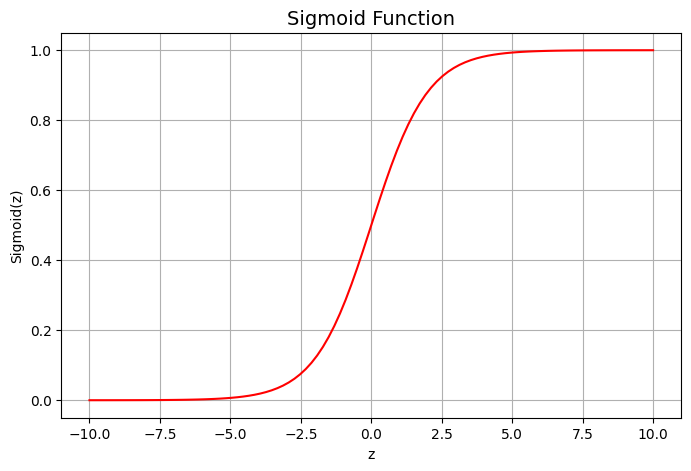

In [ ]:
# Plotting the Sigmoid Curve
z = np.linspace(-10, 10, 100)
s = sigmoid(z)

plt.figure(figsize=(8, 5))
plt.plot(z, s, color='red')
plt.title('Sigmoid Function', fontsize=14)
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.grid()
plt.show()

In [ ]:
# --- Interactive Visualization ---
def interactive_sigmoid(weight=1.0, bias=0.0):
    z = np.linspace(-10, 10, 100)
    s = sigmoid(weight * z + bias)
    plt.figure(figsize=(8, 5))
    plt.plot(z, s, color='blue')
    plt.title(f'Sigmoid Function (Weight={weight}, Bias={bias})')
    plt.xlabel('z')
    plt.ylabel('Sigmoid(z)')
    plt.grid()
    plt.show()

interact(interactive_sigmoid, weight=(-5.0, 5.0, 0.1), bias=(-5.0, 5.0, 0.1))

interactive(children=(FloatSlider(value=1.0, description='weight', max=5.0, min=-5.0), FloatSlider(value=0.0, …

<function __main__.interactive_sigmoid(weight=1.0, bias=0.0)>

# Section 3: Binary Classification with Logistic Regression

#### **Example: Predicting if a Student Passes**

- **Features (X):** Hours Studied
- **Target (y):** Pass (1) or Fail (0)

Let's create a simple dataset.

In [ ]:
# Sample Data
np.random.seed(0)
hours = np.random.randint(1, 10, 20)
pass_fail = (hours + np.random.randn(20) > 5).astype(int)

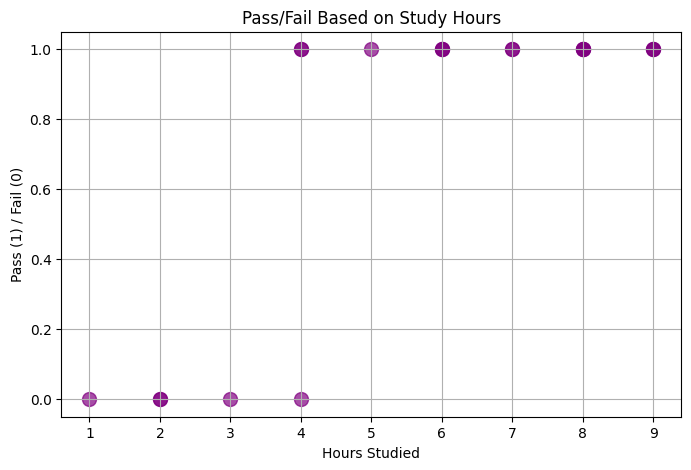

In [ ]:
# Data Visualization
plt.figure(figsize=(8, 5))
plt.scatter(hours, pass_fail, color='purple', s=100, alpha=0.7)
plt.xlabel('Hours Studied')
plt.ylabel('Pass (1) / Fail (0)')
plt.title('Pass/Fail Based on Study Hours')
plt.grid()
plt.show()

In [ ]:
# Model Training
X = hours.reshape(-1, 1)
y = pass_fail

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [ ]:
# Predictions
y_pred = log_reg.predict(X)

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        15

    accuracy                           0.95        20
   macro avg       0.97      0.90      0.93        20
weighted avg       0.95      0.95      0.95        20



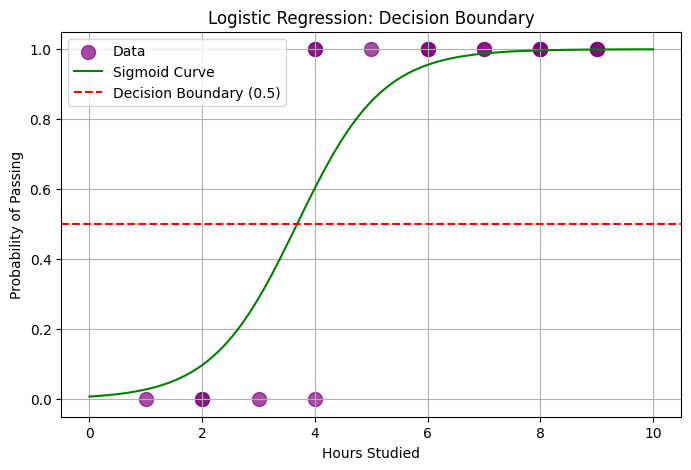

In [ ]:
# Decision Boundary Visualization
x_range = np.linspace(0, 10, 100).reshape(-1, 1)
probabilities = log_reg.predict_proba(x_range)[:, 1]

plt.figure(figsize=(8, 5))
plt.scatter(hours, pass_fail, color='purple', s=100, alpha=0.7, label='Data')
plt.plot(x_range, probabilities, color='green', label='Sigmoid Curve')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Decision Boundary')
plt.legend()
plt.grid()
plt.show()

# Section 4: Multiclass Classification with Logistic Regression


#### **Example: Classifying Iris Flowers**
We'll classify Iris flowers into three species:
- Setosa
- Versicolor
- Virginica


In [ ]:
# Load Iris Dataset
iris = load_iris()
X_iris = iris.data[:, :2]  # Using two features for visualization
y_iris = iris.target

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

In [ ]:
# Model Training
log_reg_multi = LogisticRegression(multi_class='ovr')
log_reg_multi.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [ ]:
# Predictions
y_pred_multi = log_reg_multi.predict(X_test)

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_multi))
print("\nClassification Report:\n", classification_report(y_test, y_pred_multi))


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



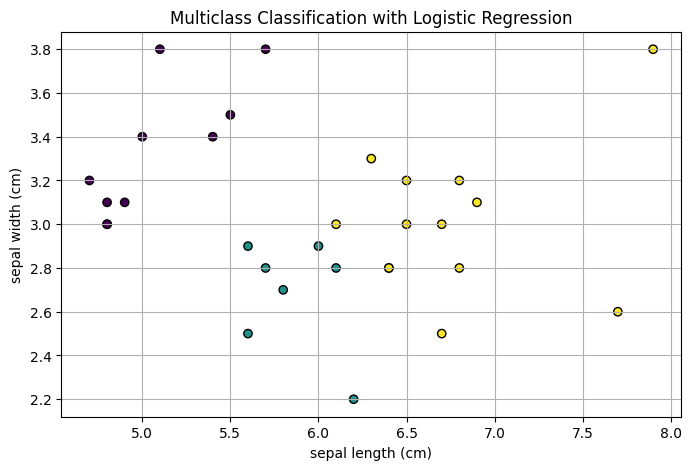

In [ ]:
# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_multi, cmap='viridis', edgecolors='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Multiclass Classification with Logistic Regression')
plt.grid()
plt.show()

## **Section 5: Assignments**

### Beginner Assignment: Predicting Pass/Fail Based on Study Hours

Task:
- Use Logistic Regression to predict if a student will pass based on study hours.
- Visualize the data and decision boundary.
- Using real world data from kaggle

**Hint:** Use a kaggle dataset and modify the code.

In [ ]:
 = pd.read_csv("StudentStudyHours.csv")

X = data[["StudyHours"]]
y = data["Pass"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

plt.scatter(X_train, y_train, label="Training Data")
plt.scatter(X_test, y_pred, label="Predictions", color='red')
plt.xlabel("Study Hours")
plt.ylabel("Pass/Fail")
plt.legend()
plt.show()

### Advanced Assignment: Classifying Flowers

Task:
- Use the Iris dataset from kaggle.
- Train Logistic Regression for multiclass classification.
- Visualize the classification results with decision boundaries.

**Hint:** Experiment with different features and observe how performance changes.


In [ ]:
iris_data = pd.read_csv("Iris.csv")

X = iris_data.iloc[:, [1, 3]].values
y = iris_data["Species"].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


multi_model = LogisticRegression(multi_class='ovr')
multi_model.fit(X_train, y_train)
y_pred = multi_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(multi_model, X_test, y_test)


## **References**



*   https://youtu.be/T5AoqxQFkzY?si=AeKiKwcwxm506VJz
*   https://www.youtube.com/watch?v=nk2CQITm_eo
*   https://www.youtube.com/watch?v=yIYKR4sgzI8
*   Machine Learning from Andrew Ng on Coursera

